In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
monthly_file = '../Brent Oil Futures - Nov 24 (LCOX4)/Brent Oil Futures Monthly.csv'
weekly_file = '../Brent Oil Futures - Nov 24 (LCOX4)/Brent Oil Futures Weekly.csv'

# Reading the files
monthly_data = pd.read_csv(monthly_file)
weekly_data = pd.read_csv(weekly_file)




In [5]:
# Function to preprocess the datasets (already applied to the cleaned datasets)
def preprocess_data(df):
    # Convert the Date column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
    
    # Clean the Vol. column (convert K and M to numerical values)
    def convert_volume(vol):
        if isinstance(vol, str):
            if 'K' in vol:
                return float(vol.replace('K', '')) * 1e3
            elif 'M' in vol:
                return float(vol.replace('M', '')) * 1e6
        return float(vol)

    df['Vol.'] = df['Vol.'].apply(convert_volume)
    
    # Clean the Change % column (remove % and convert to float)
    df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
    
    # Sort the dataframe by Date in ascending order
    df = df.sort_values(by='Date')
    
    return df



In [6]:
# Apply preprocessing to both monthly and weekly datasets (if needed)
monthly_data = preprocess_data(monthly_data)
weekly_data = preprocess_data(weekly_data)



In [8]:
# Display first few rows of each dataset
monthly_data.head(), weekly_data.head()

(         Date  Price   Open   High    Low       Vol.  Change %
 59 2019-10-01  60.23  59.38  62.34  56.15  5610000.0     -0.90
 58 2019-11-01  62.43  59.45  64.60  59.40  4790000.0      3.65
 57 2019-12-01  66.00  60.73  68.99  60.30  4450000.0      5.72
 56 2020-01-01  58.16  66.41  71.75  57.71  5800000.0    -11.88
 55 2020-02-01  50.52  56.16  60.00  50.05  5270000.0    -13.14,
           Date  Price   Open   High    Low       Vol.  Change %
 260 2019-09-22  61.91  65.23  65.50  60.76   835420.0     -3.69
 259 2019-09-29  58.37  62.24  62.24  56.15  1260000.0     -5.72
 258 2019-10-06  60.51  58.02  60.69  57.38  1400000.0      3.67
 257 2019-10-13  59.42  60.69  60.73  58.00  1340000.0     -1.80
 256 2019-10-20  62.02  59.23  62.11  58.26  1210000.0      4.38)

2. Plotting Time Series Data
Here are a few time series plots you can generate to visualize the data trends.

a. Price over Time for Monthly and Weekly Data

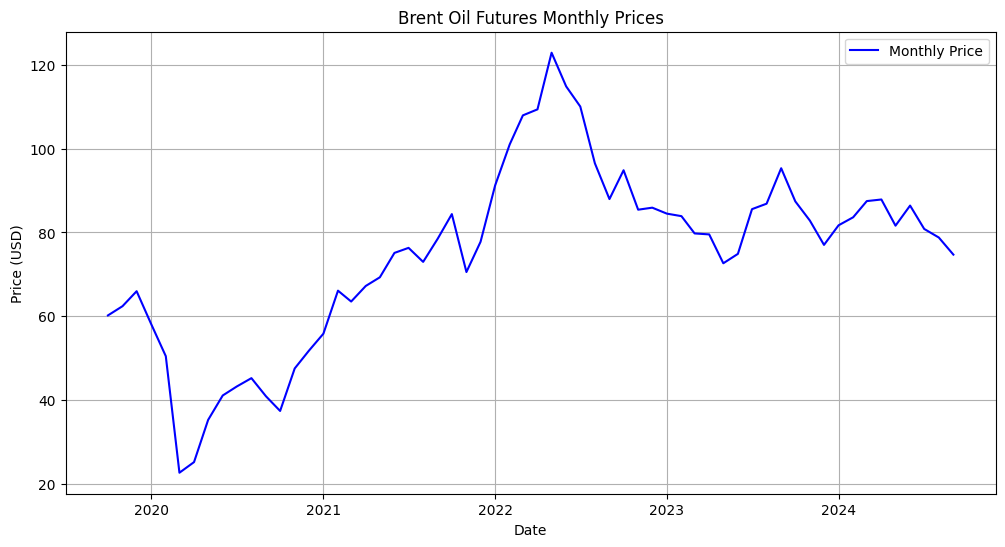

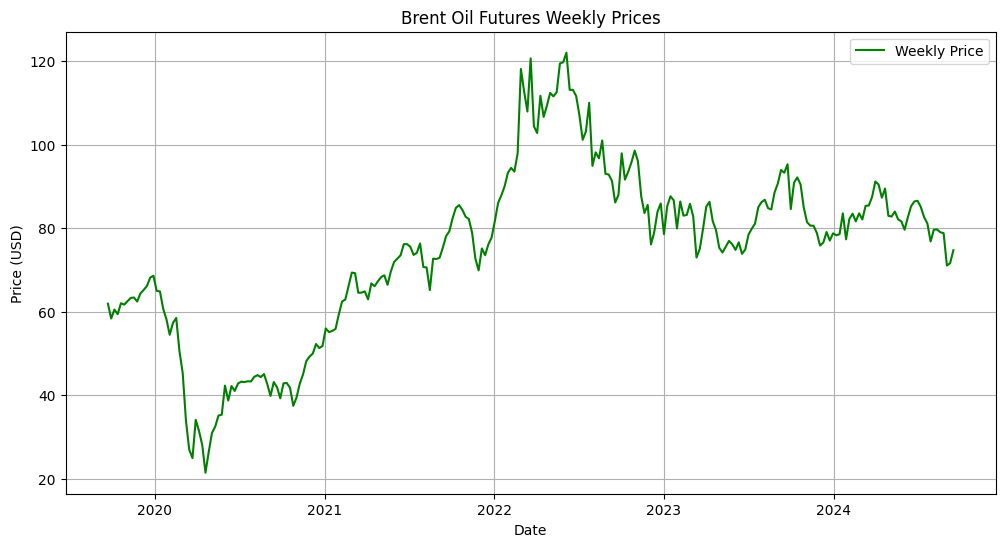

In [9]:
# Plotting Monthly Prices
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['Price'], label='Monthly Price', color='blue')
plt.title('Brent Oil Futures Monthly Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Weekly Prices
plt.figure(figsize=(12, 6))
plt.plot(weekly_data['Date'], weekly_data['Price'], label='Weekly Price', color='green')
plt.title('Brent Oil Futures Weekly Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


c. Price Change Percentage Over Time

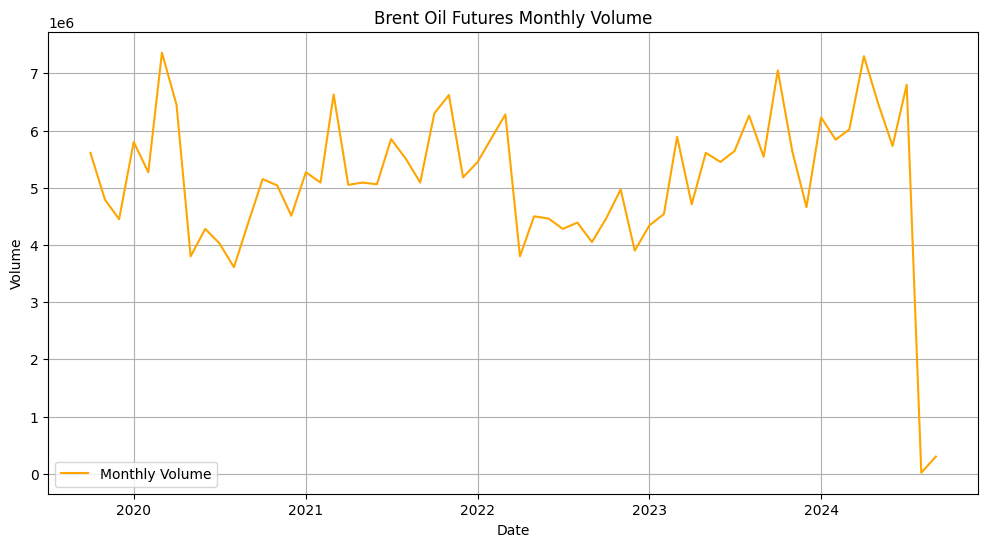

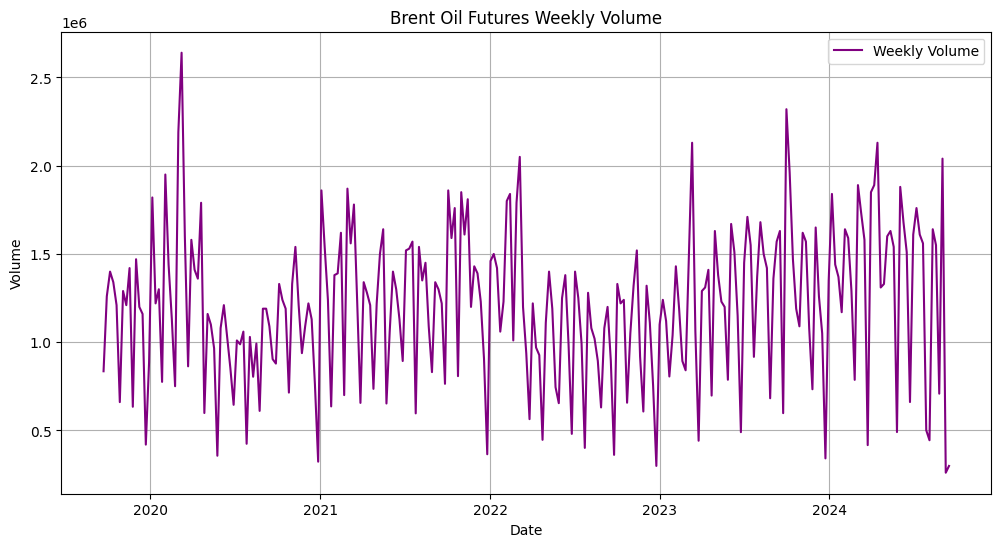

In [10]:
# Plotting Monthly Volume
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Date'], monthly_data['Vol.'], label='Monthly Volume', color='orange')
plt.title('Brent Oil Futures Monthly Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

# Plotting Weekly Volume
plt.figure(figsize=(12, 6))
plt.plot(weekly_data['Date'], weekly_data['Vol.'], label='Weekly Volume', color='purple')
plt.title('Brent Oil Futures Weekly Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()


3. Descriptive Statistics
You can also calculate basic statistics to understand the data better:

In [11]:
# Monthly Data Statistics
print("Monthly Data Statistics:\n", monthly_data.describe())

# Weekly Data Statistics
print("\nWeekly Data Statistics:\n", weekly_data.describe())


Monthly Data Statistics:
                       Date       Price        Open        High         Low  \
count                   60   60.000000   60.000000   60.000000   60.000000   
mean   2022-03-17 06:48:00   74.784667   73.778833   80.007833   68.366833   
min    2019-10-01 00:00:00   22.740000   25.990000   36.400000   15.980000   
25%    2020-12-24 06:00:00   63.262500   60.410000   68.637500   58.977500   
50%    2022-03-16 12:00:00   78.660000   78.300000   83.355000   71.930000   
75%    2023-06-08 12:00:00   86.522500   85.970000   89.160000   80.620000   
max    2024-09-01 00:00:00  122.840000  116.080000  139.130000  107.030000   
std                    NaN   21.441499   20.363122   21.917342   19.656372   

               Vol.   Change %  
count  6.000000e+01  60.000000  
mean   5.129269e+06   1.236833  
min    1.711000e+04 -54.990000  
25%    4.460000e+06  -5.542500  
50%    5.165000e+06   1.560000  
75%    5.860000e+06   7.637500  
max    7.360000e+06  39.810000  
std    

4. Saving Processed Data (Optional)
If you need to save the cleaned data in your notebook session:

In [12]:
# Save the cleaned data (if needed)
monthly_data.to_csv('Brent_Oil_Futures_Monthly_Cleaned.csv', index=False)
weekly_data.to_csv('Brent_Oil_Futures_Weekly_Cleaned.csv', index=False)
